In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('supermarket_sales.csv')

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.shape

(1000, 17)

### Analysing by Branches of the supermarket

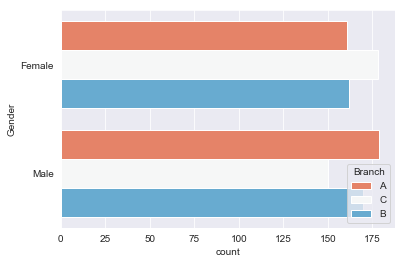

In [5]:
sns.set_style('darkgrid')
sns.countplot(y='Gender',hue='Branch',data=df,palette='RdBu', saturation=1)

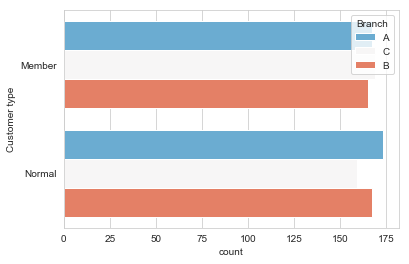

In [6]:
sns.set_style('whitegrid')
sns.countplot(y='Customer type',hue='Branch',data=df,palette='RdBu_r', saturation=1)

In [7]:
df['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

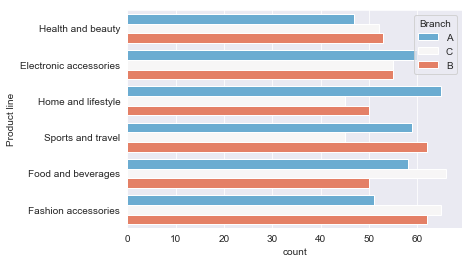

In [8]:
sns.set_style('darkgrid')
sns.countplot(y='Product line',hue='Branch',data=df,palette='RdBu_r', saturation=1)

Branch  Product line          
A       Home and lifestyle        65
        Electronic accessories    60
        Sports and travel         59
        Food and beverages        58
        Fashion accessories       51
        Health and beauty         47
B       Fashion accessories       62
        Sports and travel         62
        Electronic accessories    55
        Health and beauty         53
        Food and beverages        50
        Home and lifestyle        50
C       Food and beverages        66
        Fashion accessories       65
        Electronic accessories    55
        Health and beauty         52
        Home and lifestyle        45
        Sports and travel         45
Name: Product line, dtype: int64


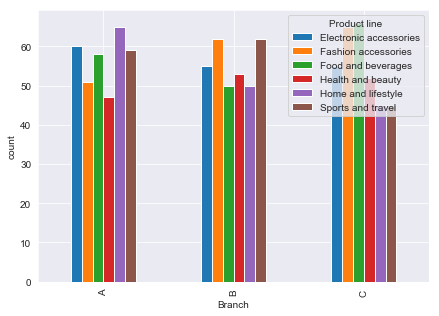

In [9]:
df_branch_product = df.groupby('Branch')['Product line'].value_counts()
print(df_branch_product)
df1 = df_branch_product.unstack()
df1.plot(kind='bar', figsize=(7, 5))
plt.ylabel('count')
plt.show()

Branch  Gender
A       Male      179
        Female    161
B       Male      170
        Female    162
C       Female    178
        Male      150
Name: Gender, dtype: int64


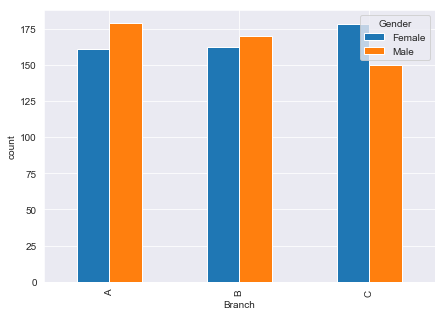

In [10]:
df_branch_gender = df.groupby('Branch')['Gender'].value_counts()
print(df_branch_gender)
df1 = df_branch_gender.unstack()
df1.plot(kind='bar', figsize=(7, 5))
plt.ylabel('count')
plt.show()

Branch  Customer type
A       Normal           173
        Member           167
B       Normal           167
        Member           165
C       Member           169
        Normal           159
Name: Customer type, dtype: int64


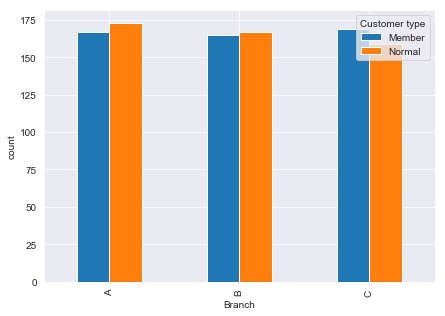

In [11]:
df_branch_cus_type = df.groupby('Branch')['Customer type'].value_counts()
print(df_branch_cus_type)
df1 = df_branch_cus_type.unstack()
df1.plot(kind='bar', figsize=(7, 5))
plt.ylabel('count')
plt.show()

Branch  Payment    
A       Ewallet        126
        Cash           110
        Credit card    104
B       Ewallet        113
        Cash           110
        Credit card    109
C       Cash           124
        Ewallet        106
        Credit card     98
Name: Payment, dtype: int64


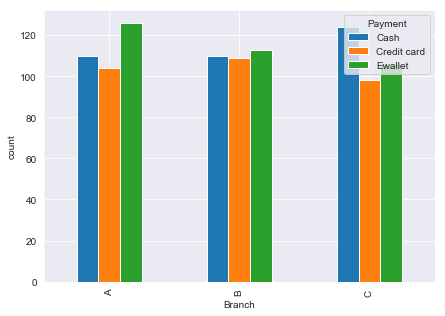

In [12]:
df_branch_pay = df.groupby('Branch')['Payment'].value_counts()
print(df_branch_pay)
df1 = df_branch_pay.unstack()
df1.plot(kind='bar', figsize=(7, 5))
plt.ylabel('count')
plt.show()

In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'])
df['day'] = (df['Date']).dt.day
#df['day'] = pd.to_datetime(df['day'])
df['weekday'] = (df['Date']).dt.weekday
df['month'] = (df['Date']).dt.month
df['year'] = (df['Date']).dt.year
df['hour'] = (df['Time']).dt.hour
df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Payment,cogs,gross margin percentage,gross income,Rating,day,weekday,month,year,hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,Ewallet,522.83,4.761905,26.1415,9.1,5,5,1,2019,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,Cash,76.40,4.761905,3.8200,9.6,8,4,3,2019,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,Credit card,324.31,4.761905,16.2155,7.4,3,6,3,2019,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,Ewallet,465.76,4.761905,23.2880,8.4,27,6,1,2019,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,Ewallet,604.17,4.761905,30.2085,5.3,8,4,2,2019,10


In [14]:
df['weekday'].value_counts()

5    164
1    158
2    143
4    139
3    138
6    133
0    125
Name: weekday, dtype: int64

Branch  weekday
A       6          52
        1          51
        4          50
        5          50
        0          48
        3          46
        2          43
B       5          60
        1          53
        4          51
        2          50
        3          44
        0          39
        6          35
C       1          54
        5          54
        2          50
        3          48
        6          46
        0          38
        4          38
Name: weekday, dtype: int64


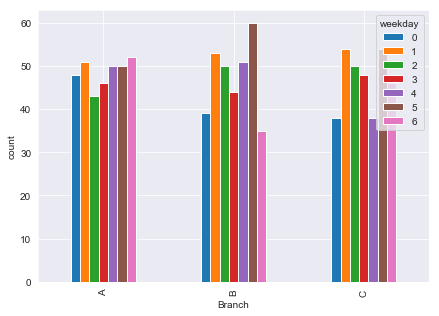

In [15]:
df_branch_weekday = df.groupby('Branch')['weekday'].value_counts()
print(df_branch_weekday)
df1 = df_branch_weekday.unstack()
df1.plot(kind='bar', figsize=(7, 5))
plt.ylabel('count')
plt.show()

Branch  hour
A       10      38
        15      37
        11      35
        12      33
        18      33
        16      32
        13      31
        17      27
        19      27
        14      25
        20      22
B       19      50
        13      38
        18      35
        11      33
        15      32
        14      30
        10      26
        20      26
        12      25
        17      20
        16      17
C       10      37
        19      36
        13      34
        15      33
        12      31
        14      28
        16      28
        17      27
        20      27
        18      25
        11      22
Name: hour, dtype: int64


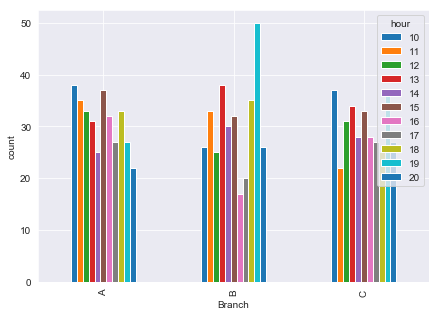

In [16]:
df_branch_hour = df.groupby('Branch')['hour'].value_counts()
print(df_branch_hour)
df1 = df_branch_hour.unstack()
df1.plot(kind='bar', figsize=(7, 5))
plt.ylabel('count')
plt.show()

Branch  month
A       3        127
        1        119
        2         94
B       3        112
        1        111
        2        109
C       1        122
        3        106
        2        100
Name: month, dtype: int64


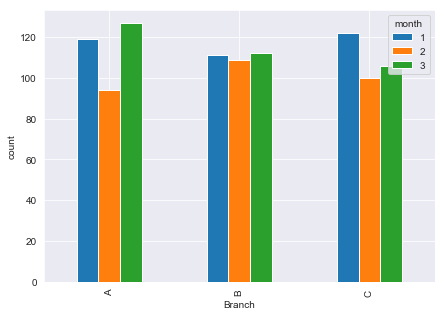

In [17]:
df_branch_month = df.groupby('Branch')['month'].value_counts()
print(df_branch_month)
df1 = df_branch_month.unstack()
df1.plot(kind='bar', figsize=(7, 5))
plt.ylabel('count')
plt.show()

Branch  year
A       2019    340
B       2019    332
C       2019    328
Name: year, dtype: int64


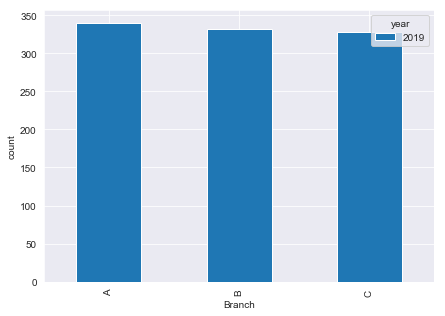

In [18]:
df_branch_year = df.groupby('Branch')['year'].value_counts()
print(df_branch_year)
df1 = df_branch_year.unstack()
df1.plot(kind='bar', figsize=(7, 5))
plt.ylabel('count')
plt.show()

In [19]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Payment,cogs,gross margin percentage,gross income,Rating,day,weekday,month,year,hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,Ewallet,522.83,4.761905,26.1415,9.1,5,5,1,2019,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,Cash,76.40,4.761905,3.8200,9.6,8,4,3,2019,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,Credit card,324.31,4.761905,16.2155,7.4,3,6,3,2019,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,Ewallet,465.76,4.761905,23.2880,8.4,27,6,1,2019,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,Ewallet,604.17,4.761905,30.2085,5.3,8,4,2,2019,10


Branch
A    18625.49
B    18478.88
C    18567.76
Name: Unit price, dtype: float64


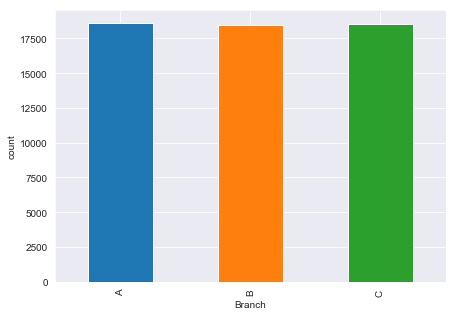

In [20]:
df_branch_unitp = df.groupby('Branch')['Unit price'].sum()
print(df_branch_unitp)
#df1 = df_branch_unitp.unstack()
df_branch_unitp.plot(kind='bar', figsize=(7, 5))
plt.ylabel('count')
plt.show()

Branch
A    5057.1605
B    5057.0320
C    5265.1765
Name: Tax 5%, dtype: float64


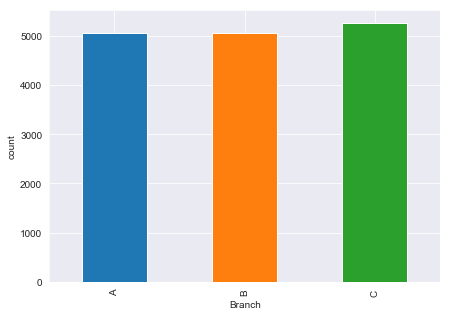

In [21]:
df_branch_tax = df.groupby('Branch')['Tax 5%'].sum()
print(df_branch_tax)
#df1 = df_branch_unitp.unstack()
df_branch_tax.plot(kind='bar', figsize=(7, 5))
plt.ylabel('count')
plt.show()

Branch
A    1859
B    1820
C    1831
Name: Quantity, dtype: int64


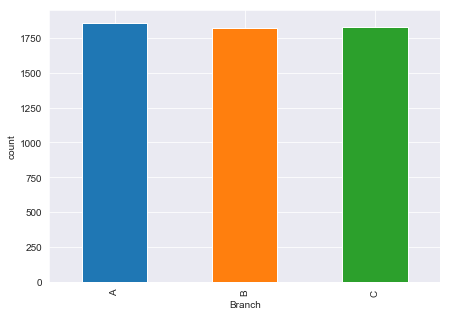

In [22]:
df_branch_q = df.groupby('Branch')['Quantity'].sum()
print(df_branch_q)
#df1 = df_branch_unitp.unstack()
df_branch_q.plot(kind='bar', figsize=(7, 5))
plt.ylabel('count')
plt.show()

Branch
A    106200.3705
B    106197.6720
C    110568.7065
Name: Total, dtype: float64


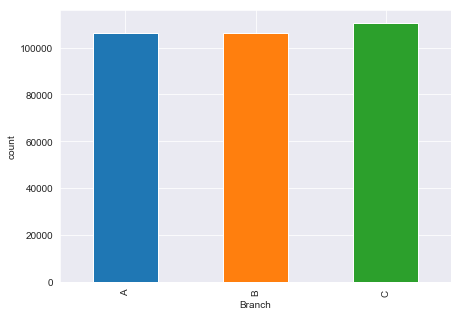

In [23]:
df_branch_total = df.groupby('Branch')['Total'].sum()
print(df_branch_total)
#df1 = df_branch_unitp.unstack()
df_branch_total.plot(kind='bar', figsize=(7, 5))
plt.ylabel('count')
plt.show()

Branch
A    101143.21
B    101140.64
C    105303.53
Name: cogs, dtype: float64


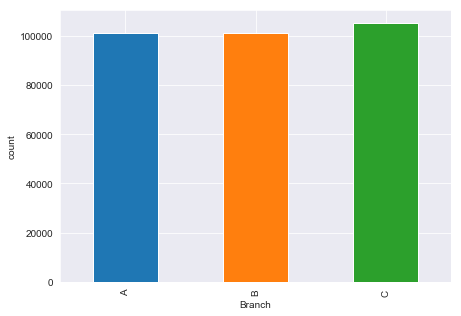

In [24]:
df_branch_cogs = df.groupby('Branch')['cogs'].sum()
print(df_branch_cogs)
#df1 = df_branch_unitp.unstack()
df_branch_cogs.plot(kind='bar', figsize=(7, 5))
plt.ylabel('count')
plt.show()

Branch
A    1619.047619
B    1580.952381
C    1561.904762
Name: gross margin percentage, dtype: float64


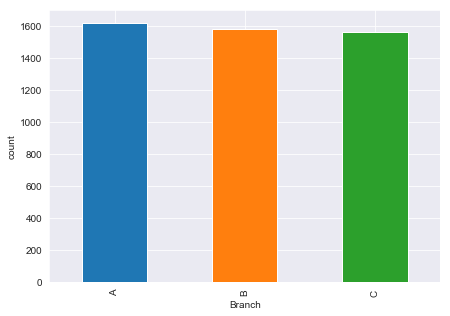

In [25]:
df_branch_gmp = df.groupby('Branch')['gross margin percentage'].sum()
print(df_branch_gmp)
#df1 = df_branch_unitp.unstack()
df_branch_gmp.plot(kind='bar', figsize=(7, 5))
plt.ylabel('count')
plt.show()

Branch
A    5057.1605
B    5057.0320
C    5265.1765
Name: gross income, dtype: float64


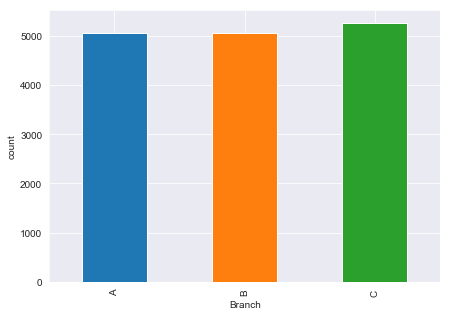

In [26]:
df_branch_gi = df.groupby('Branch')['gross income'].sum()
print(df_branch_gi)
#df1 = df_branch_unitp.unstack()
df_branch_gi.plot(kind='bar', figsize=(7, 5))
plt.ylabel('count')
plt.show()

Branch
A    2389.2
B    2263.6
C    2319.9
Name: Rating, dtype: float64


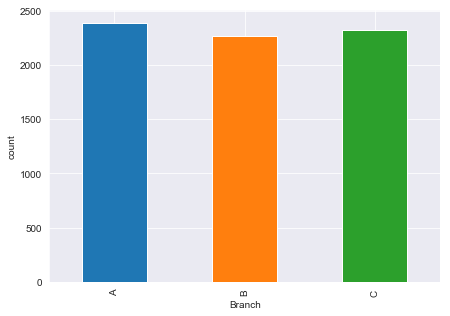

In [27]:
df_branch_rating = df.groupby('Branch')['Rating'].sum()
print(df_branch_rating)
#df1 = df_branch_unitp.unstack()
df_branch_rating.plot(kind='bar', figsize=(7, 5))
plt.ylabel('count')
plt.show()

In [28]:
#!conda install -y -c anaconda seaborn=0.9.0

### It's time to check for Trend with Time series plots for days, months and year


C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


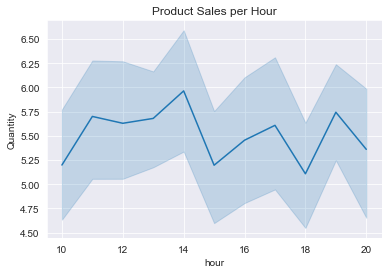

In [29]:
genderCount  = sns.lineplot(x="hour",  y = 'Quantity',data =df).set_title("Product Sales per Hour")

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


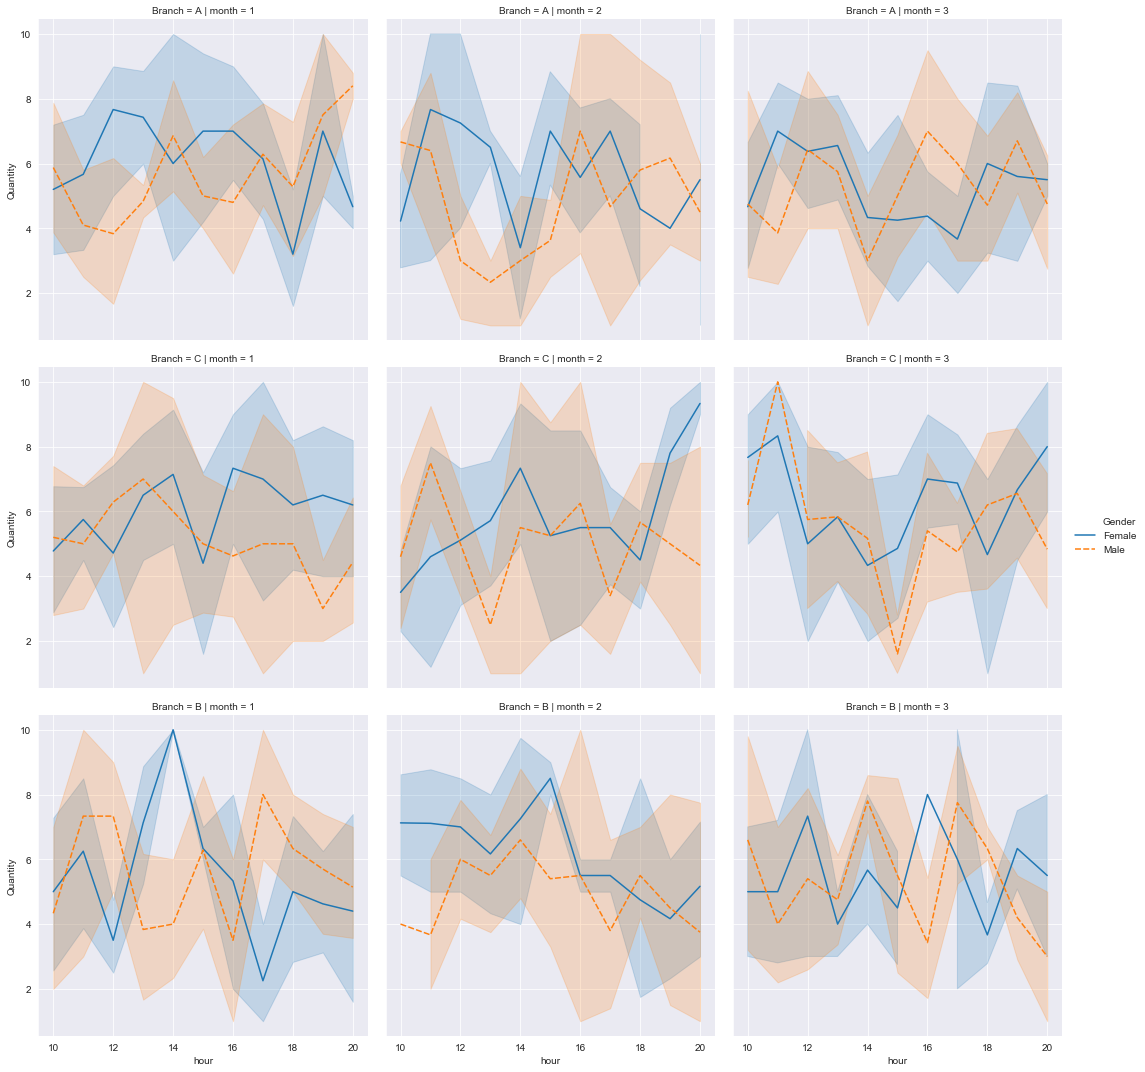

In [30]:
genderCount  = sns.relplot(x="hour",  y = 'Quantity', col= 'month' , row= 'Branch', kind="line", hue="Gender", style="Gender", data =df)

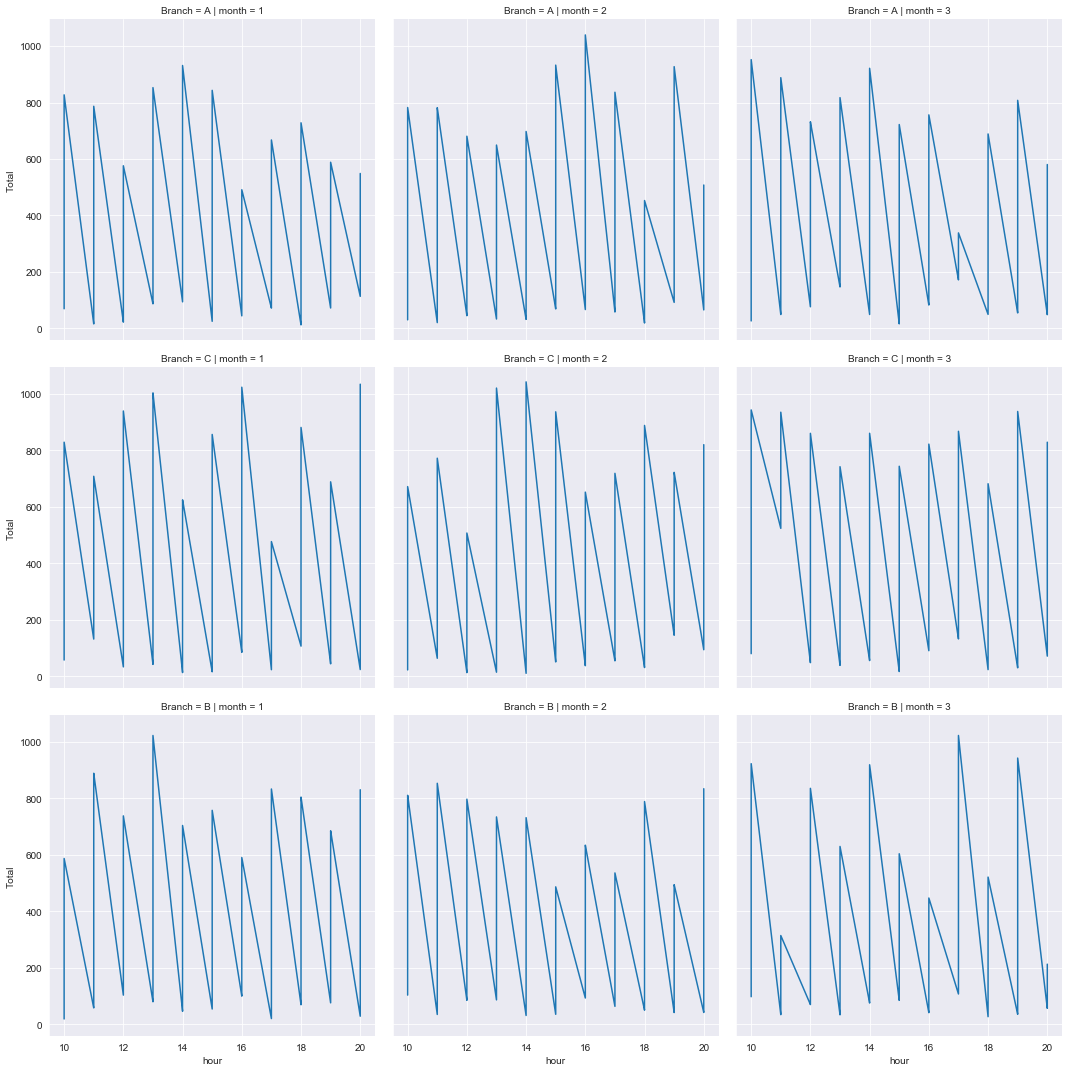

In [31]:
genderCount  = sns.relplot(x="hour",  y = 'Total', col= 'month' , row= 'Branch', estimator = None, kind="line", data =df)

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


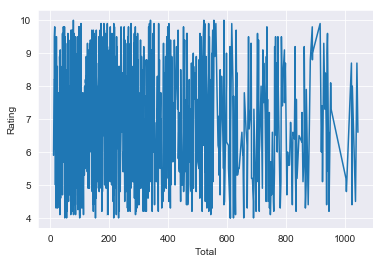

In [32]:
ageDisSpend = sns.lineplot(x="Total", y = "Rating", data =df)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,day,weekday,month,year,hour
Unit price,1.000000e+00,1.077756e-02,6.339621e-01,6.339621e-01,6.339621e-01,-6.998957e-16,6.339621e-01,-8.777507e-03,5.702090e-02,-7.040130e-03,-2.738719e-02,NaN,8.242210e-03
Quantity,1.077756e-02,1.000000e+00,7.055102e-01,7.055102e-01,7.055102e-01,-3.849075e-16,7.055102e-01,-1.581490e-02,-4.334686e-02,5.476994e-02,-1.452428e-02,NaN,-7.316886e-03
Tax 5%,6.339621e-01,7.055102e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.461896e-16,1.000000e+00,-3.644170e-02,-2.514770e-03,3.880903e-02,-2.230134e-02,NaN,-2.770440e-03
Total,6.339621e-01,7.055102e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.408632e-16,1.000000e+00,-3.644170e-02,-2.514770e-03,3.880903e-02,-2.230134e-02,NaN,-2.770440e-03
cogs,6.339621e-01,7.055102e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.439279e-15,1.000000e+00,-3.644170e-02,-2.514770e-03,3.880903e-02,-2.230134e-02,NaN,-2.770440e-03
gross margin percentage,-6.998957e-16,-3.849075e-16,2.461896e-16,2.408632e-16,1.439279e-15,1.000000e+00,2.461896e-16,2.042714e-15,-4.999832e-16,1.811363e-17,8.935965e-17,NaN,-2.114722e-16
gross income,6.339621e-01,7.055102e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.461896e-16,1.000000e+00,-3.644170e-02,-2.514770e-03,3.880903e-02,-2.230134e-02,NaN,-2.770440e-03
Rating,-8.777507e-03,-1.581490e-02,-3.644170e-02,-3.644170e-02,-3.644170e-02,2.042714e-15,-3.644170e-02,1.000000e+00,-7.075821e-03,-1.387905e-02,-4.288037e-02,NaN,-3.058764e-02
day,5.702090e-02,-4.334686e-02,-2.514770e-03,-2.514770e-03,-2.514770e-03,-4.999832e-16,-2.514770e-03,-7.075821e-03,1.000000e+00,-6.669747e-02,-1.189964e-01,NaN,2.066810e-02
weekday,-7.040130e-03,5.476994e-02,3.880903e-02,3.880903e-02,3.880903e-02,1.811363e-17,3.880903e-02,-1.387905e-02,-6.669747e-02,1.000000e+00,3.535669e-02,NaN,1.430502e-02


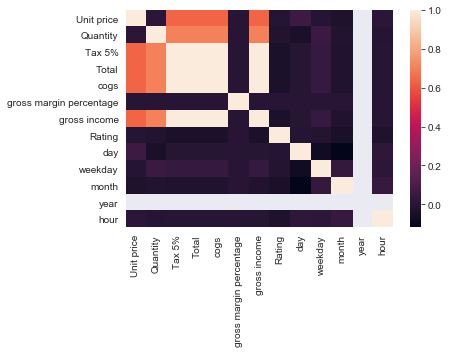

In [33]:
sns.heatmap(df.corr())
df.corr()

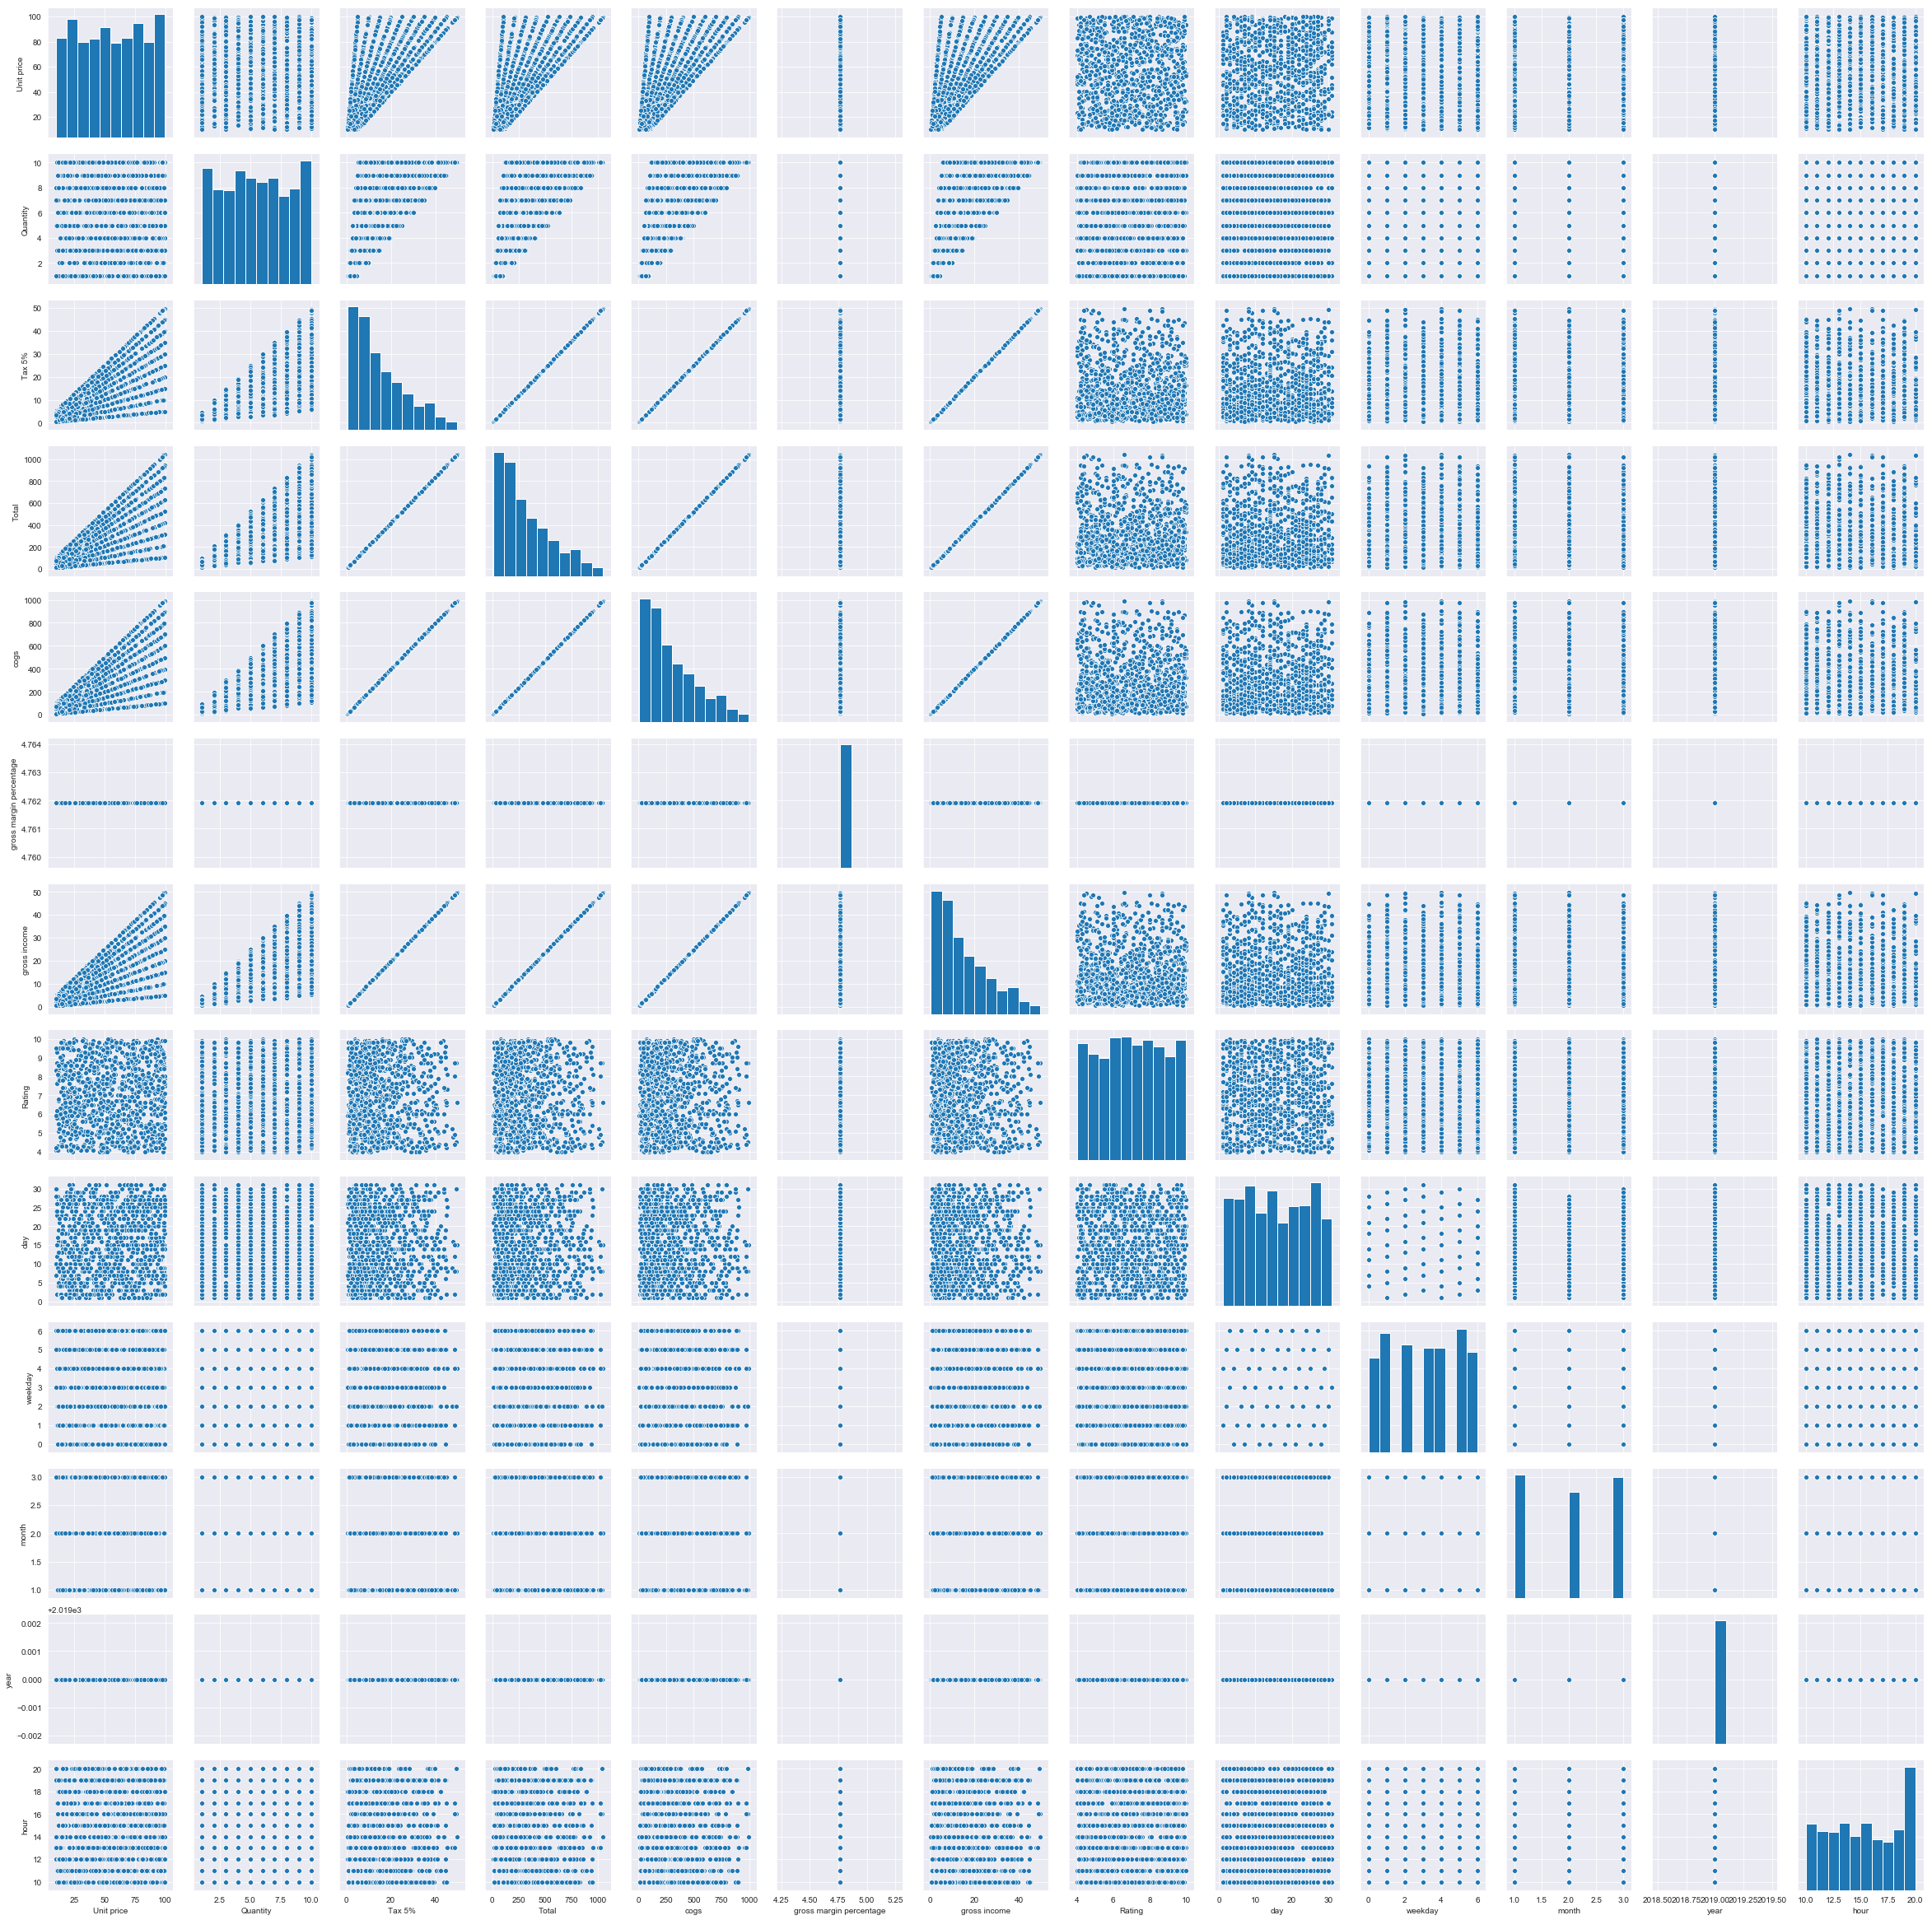

In [34]:
sns.pairplot(df)